# Лабораторная работа 3. Выбор признаков.

### Задание 1. Для набора `IRIS` определить важность признаков для решения задачи классификации. Сделать выводы.



In [88]:
# Установка borutashap
# ! pip install BorutaShap
# импорт библиотек
import numpy as np
import matplotlib as plt
from sklearn.ensemble import RandomForestClassifier
from boruta import BorutaPy
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import RFECV
plt.style.use('fivethirtyeight')
from BorutaShap import BorutaShap

In [27]:
# Общие данные
iris = load_iris()
# Предикторы
features = iris.data
# Таргет
target = iris.target
# Имя переменных
feature_names = iris.feature_names

In [25]:
# Для удобства создаем датафрейм
df = pd.DataFrame(features, columns = feature_names)
df['target'] = iris.target
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [50]:
df.target.value_counts()

0    50
1    50
2    50
Name: target, dtype: int64

In [51]:
# Создаем объект-классификатор случайного леса
randomforest = RandomForestClassifier(random_state=42, n_jobs=-1)

In [31]:
# Тренируем модель
model = randomforest.fit(features, target)

In [32]:
# Вычислить важности признаков
importances = model.feature_importances_

In [34]:
# Сортируем важности признаков
indices = np.argsort(importances)[::-1]

In [35]:
indices

array([2, 3, 0, 1], dtype=int64)

In [36]:
# Перераспределим имена признаков так чтобы они совпадали с отсортированной важностью признаков
names = [iris.feature_names[i] for i in indices]

Text(0.5, 1.0, 'Важность признаков')

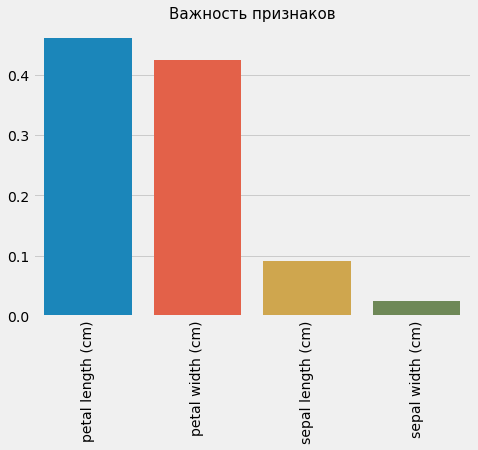

In [49]:
# Строим график
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7,5))

# Выводим Барплот важности признаков
# столбец А
sns.barplot(x=names, y=importances[indices])
ax.tick_params(axis='x', labelrotation = 90)
ax.set_title('Важность признаков', size=15)

# Удаление рекурсивных признаков

Text(0.5, 1.0, 'RFECV для RandomDorestClassifier')

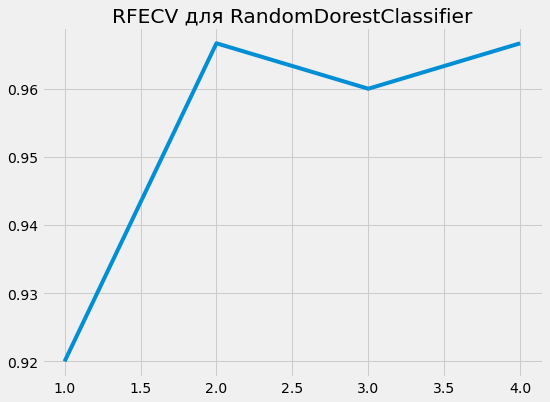

In [74]:
fig, ax = plt.subplots(figsize=(8,6))
min_features_to_select = 1
rfe = RFECV(RandomForestClassifier(n_estimators=100, random_state=42), cv=5, step=1, 
            scoring='accuracy',min_features_to_select=min_features_to_select)
selector = rfe.fit(features, target)
plt.plot(range(min_features_to_select, len(rfe.grid_scores_)+min_features_to_select),
        rfe.grid_scores_)
plt.title('RFECV для RandomDorestClassifier')

# BORUTA 
Будет взят встроенный датасет wine от sklearn. Так как в датасете ozon непонятна таргетированная переменная

In [77]:
from sklearn.datasets import load_wine

In [78]:
# Общие данные
wine = load_wine()
# Предикторы
features = wine.data
# Таргет
target = wine.target
# Имя переменных
feature_names = wine.feature_names

In [80]:
# Для удобства создаем датафрейм
df = pd.DataFrame(features, columns = feature_names)
df['target'] = wine.target
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


# Boruta

В основе алгоритма лежит модель случайного леса. Boruta сравнивает важность
функции (feature importance), полученную после построения модели, с важностью
функции, полученной с помощью перемешанной копии набора данных (так называемые
теневые признаки). Каждый раз, когда признак имеет более высокий Z-показатель, чем
максимальный Z-показатель его теневых объектов, чем у лучших теневых объектов,
Робута записывает «попадания» для этого объекта. Если функция не записывает
попадание в определенном количестве итераций, признак считается не важным.

In [101]:
forest = RandomForestClassifier(n_jobs=-1, class_weight='balanced')

# let's initialize Boruta
feat_selector = BorutaPy(
    forest,
    n_estimators='auto',
    verbose=2  # number of iterations to perform
)

feat_selector.fit(X=wine.data,y=wine.target)

feat_selector.support_

feat_selector.ranking_

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	13
Tentative: 	0
Rejected: 	0


BorutaPy finished running.

Iteration: 	9 / 100
Confirmed: 	13
Tentative: 	0
Rejected: 	0


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

### По умолчанию в borutashap заложена модель randomforest

In [82]:
model = randomforest.fit(features, target)

In [90]:
feature_selector = BorutaShap(importance_measure='shap',
                              classification=True)

feature_selector.fit(X=df[feature_names], y=df.target, n_trials=100, random_state=0)

  0%|          | 0/100 [00:00<?, ?it/s]

13 attributes confirmed important: ['alcalinity_of_ash', 'od280/od315_of_diluted_wines', 'total_phenols', 'flavanoids', 'proanthocyanins', 'magnesium', 'color_intensity', 'ash', 'malic_acid', 'nonflavanoid_phenols', 'hue', 'alcohol', 'proline']
0 attributes confirmed unimportant: []
0 tentative attributes remains: []


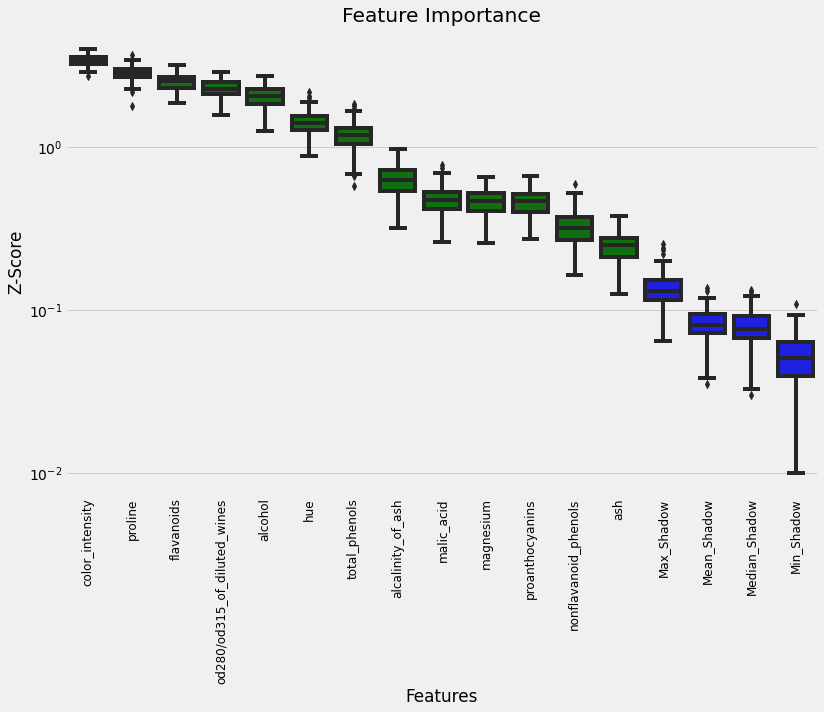

In [94]:
# Построим график боксплот признаков
feature_selector.plot(X_size=12, figsize=(12,8),
            y_scale='log', which_features='all')

In [95]:
feature_selector = BorutaShap(importance_measure='gini',
                              classification=True)

feature_selector.fit(X=df[feature_names], y=df.target, n_trials=100, random_state=0)

  0%|          | 0/100 [00:00<?, ?it/s]

13 attributes confirmed important: ['alcalinity_of_ash', 'od280/od315_of_diluted_wines', 'total_phenols', 'flavanoids', 'proanthocyanins', 'magnesium', 'color_intensity', 'ash', 'malic_acid', 'nonflavanoid_phenols', 'hue', 'alcohol', 'proline']
0 attributes confirmed unimportant: []
0 tentative attributes remains: []


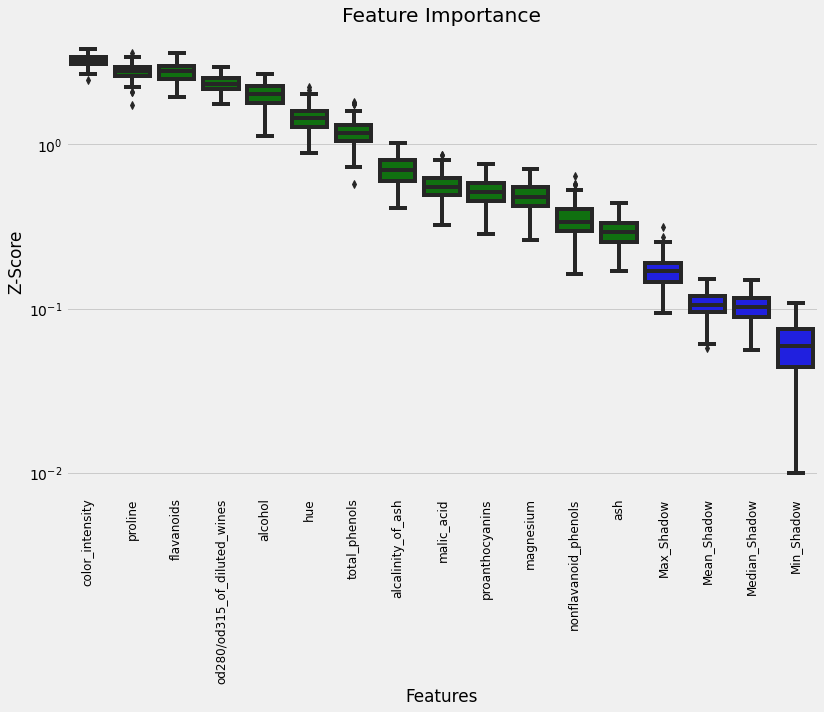

In [96]:
# Построим график боксплот признаков
feature_selector.plot(X_size=12, figsize=(12,8),
            y_scale='log', which_features='all')